In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv("C:\\Users\\user\\Desktop\\Data Science\\Projects\\Python projects\\Google playstore projects\\googleplaystore.csv\\googleplaystore.csv")

In [6]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df.shape

(10841, 13)

In [10]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [11]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

##### Setting columns to proper data types

In [12]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

The 'Size' column observations are:
1. They contain either 'k' or 'M'
2. Or is recorded as 'Varies with device'

In [13]:
# checking if there are any null columns
df['Size'].isnull().sum()

0

There are no empty columns in the Size column

In [14]:
# No of columns that contain M
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8829

In [15]:
# No of columns that contain k
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [16]:

df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [17]:
df['Size'].value_counts().sum()

10841

In [18]:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum() +df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum() + df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

10840

#### Converting the Size column into bytes

In [19]:
def size_to_bytes(size):
    if isinstance(size , str):
        if 'k' in size:
            return float(size.replace('k' , "")) * 1024
        elif 'M' in size:
            return float(size.replace('M' , "")) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    elif isinstance(size, (int, float)):
         return float(size)
    else:
        np.nan

In [20]:
df['Size'] = df['Size'].apply(size_to_bytes)

In [21]:
df['Size']

0        19922944.0
1        14680064.0
2         9122611.2
3        26214400.0
4         2936012.8
            ...    
10836    55574528.0
10837     3774873.6
10838     9961472.0
10839           NaN
10840    19922944.0
Name: Size, Length: 10841, dtype: float64

In [22]:
df['Size'].dtype

dtype('float64')

In [23]:
# rename the size column
df.rename(columns={'Size':'Size_in_bytes'},inplace=True)

In [24]:
df

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,55574528.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3774873.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9961472.0,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [25]:
# Creating a column for size in MB
df['Size_in_Megabytes']=df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [26]:
# Creating column for size in kb
df['Size_in_Kilobytes']=df['Size_in_bytes'].apply(lambda x: x/(1024))

In [27]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Megabytes,Size_in_Kilobytes
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2867.2


#### Dealing with the installs Column


In [28]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

<div class="alert alert-block alert-warning" style="background-color: skyblue; color: black;">
  <h3>Installs column</h3>
  <p>1. remove '+' sign</p>
  <p>2. remove comma(,)</p>
  <p>3. convert column to integer</p>
</div>

In [29]:
# Removing the '+' sign
df['Installs'] = df['Installs'].apply(lambda x : x.replace('+','') if '+' in str(x) else x)

In [30]:
df['Installs'].value_counts()

Installs
1,000,000        1579
10,000,000       1252
100,000          1169
10,000           1054
1,000             907
5,000,000         752
100               719
500,000           539
50,000            479
5,000             477
100,000,000       409
10                386
500               330
50,000,000        289
50                205
5                  82
500,000,000        72
1                  67
1,000,000,000      58
0                  15
Free                1
Name: count, dtype: int64

In [31]:
# removing commas
df['Installs'] = df['Installs'].apply(lambda x : x.replace(',' , '') if ',' in str(x) else x )

In [32]:
df['Installs'].replace('Free',np.nan,inplace=True)

In [33]:
# Converting to integer
df['Installs']=df['Installs'].apply(lambda x: float(x))

In [34]:
# replacing the nan values with mode
df['Installs']=df['Installs'].fillna(df['Installs'].mode()[0])

In [35]:
# Checking if there is any null/Nan value
df.Installs.isna().sum()

0

In [36]:
# making new column called installs_category
bins = [-1,10,100,1000,10000,100000,1000000,10000000,100000000]
labels = ['No','Very low','Low','Moderate','More than moderate','High','Very high','Top notch']
df['Installs_category'] = pd.cut(df['Installs'],bins=bins,labels=labels)

In [37]:
df['Installs_category'].value_counts()

Installs_category
High                  2119
Very high             2004
More than moderate    1648
Moderate              1531
Low                   1237
Very low               924
Top notch              698
No                     550
Name: count, dtype: int64

In [38]:
# checking numerical columns
df.describe()

,Rating,Size_in_bytes,Installs,Size_in_Megabytes,Size_in_Kilobytes
count,9367.000000,9.145000e+03,1.084100e+04,9145.000000,9145.000000
mean,4.193338,2.256133e+07,1.546300e+07,21.516165,22032.553406
std,0.537431,2.368637e+07,8.502555e+07,22.589084,23131.222364
min,1.000000,8.704000e+03,0.000000e+00,0.008301,8.500000
25%,4.000000,5.138022e+06,1.000000e+03,4.900000,5017.600000
50%,4.300000,1.363149e+07,1.000000e+05,13.000000,13312.000000
75%,4.500000,3.145728e+07,5.000000e+06,30.000000,30720.000000
max,19.000000,1.048576e+08,1.000000e+09,100.000000,102400.000000


In [39]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

#### To clean the price column
#### -Remove dollar sign
#### -Remove 'Everyone'
#### -Convert the column to an integer

In [40]:
# remove $ sign
df['Price'] = df['Price'].apply(lambda x : x.replace('$','') if '$' in str(x) else x )

In [41]:
# remove the 'Everyone' text
df['Price'] = df['Price'].replace('Everyone' , np.NaN)

In [42]:
# converting the column data type to float
df['Price'] = df['Price'].apply(lambda x : float(x))

In [43]:
df['Price'].dtype

dtype('float64')

In [44]:
# checking How many nan values are in the price column
df['Price'].isna().sum()

1

In [45]:
df['Price'].isna().values.any()

True

In [46]:
# Replace the Nan with mode
df['Price'].fillna(df['Price'].mode()[0],inplace=True)

In [47]:
print(f"Minimun Price is {df['Price'].min()}")
print(f"Maximun Price is {df['Price'].max()}")
print(f"Average Price is {df['Price'].mean()}")

Minimun Price is 0.0
Maximun Price is 400.0
Average Price is 1.0272733142699015


In [48]:
# Checking columns with missing values or entries
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1696
Size_in_Megabytes    1696
Size_in_Kilobytes    1696
Rating               1474
Installs_category     130
Current Ver             8
Android Ver             3
Type                    1
Content Rating          1
App                     0
Category                0
Reviews                 0
Installs                0
Price                   0
Genres                  0
Last Updated            0
dtype: int64

In [49]:
# checking percentage of missing values for each column
round(df.isnull().sum()/len(df)*100 ,2).sort_values(ascending=False)

Size_in_bytes        15.64
Size_in_Megabytes    15.64
Size_in_Kilobytes    15.64
Rating               13.60
Installs_category     1.20
Current Ver           0.07
Android Ver           0.03
Type                  0.01
Content Rating        0.01
App                   0.00
Category              0.00
Reviews               0.00
Installs              0.00
Price                 0.00
Genres                0.00
Last Updated          0.00
dtype: float64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10841 non-null  object  
 1   Category           10841 non-null  object  
 2   Rating             9367 non-null   float64 
 3   Reviews            10841 non-null  object  
 4   Size_in_bytes      9145 non-null   float64 
 5   Installs           10841 non-null  float64 
 6   Type               10840 non-null  object  
 7   Price              10841 non-null  float64 
 8   Content Rating     10840 non-null  object  
 9   Genres             10841 non-null  object  
 10  Last Updated       10841 non-null  object  
 11  Current Ver        10833 non-null  object  
 12  Android Ver        10838 non-null  object  
 13  Size_in_Megabytes  9145 non-null   float64 
 14  Size_in_Kilobytes  9145 non-null   float64 
 15  Installs_category  10711 non-null  category
dtypes: c

In [51]:
# convert reviews into integer
df['Reviews'] = pd.to_numeric(df['Reviews'],errors='coerce')

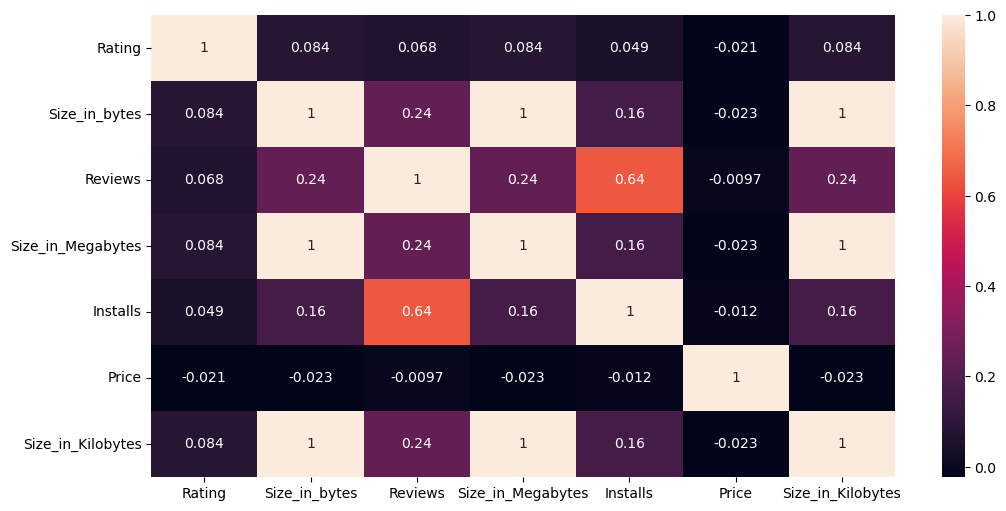

In [52]:
# checking correlation of numeric columns
plt.figure(figsize=(12,6))
numeric_columns = ["Rating","Size_in_bytes","Reviews","Size_in_Megabytes","Installs","Price","Size_in_Kilobytes"]
sns.heatmap(df[numeric_columns].corr(),annot=True);

In [53]:
df_clean=df.dropna()

In [54]:
# lets see the diffrence
print(len(df_clean))
print(len(df))

7683
10841


In [55]:
df.dropna(subset= ['Current Ver','Android Ver','Content Rating','Type','Reviews'],inplace=True)

In [56]:
# Length after removing null values in some columns
len(df)

10829

In [57]:
df.isna().sum().sort_values()

App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category     130
Rating               1469
Size_in_bytes        1694
Size_in_Megabytes    1694
Size_in_Kilobytes    1694
dtype: int64

In [58]:
# Replacing null values
df['Installs_category'] = df['Installs_category'].fillna(df['Installs_category'].mode()[0])
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Size_in_bytes'] = df['Size_in_bytes'].fillna(df['Size_in_bytes'].mean())
df['Size_in_Megabytes'] = df['Size_in_Megabytes'].fillna(df['Size_in_Megabytes'].mean())
df['Size_in_Kilobytes'] = df['Size_in_Kilobytes'].fillna(df['Size_in_Kilobytes'].mean())

In [59]:
df.isna().sum().sort_values()

App                  0
Category             0
Rating               0
Reviews              0
Size_in_bytes        0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Size_in_Megabytes    0
Size_in_Kilobytes    0
Installs_category    0
dtype: int64

In [60]:
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
No,548.0,4.349818,0.344691,1.0,4.3,4.3,4.3,5.0
Very low,923.0,4.328494,0.553886,1.0,4.3,4.3,4.4,5.0
Low,1235.0,4.145182,0.684689,1.0,4.0,4.3,4.5,5.0
Moderate,1528.0,4.050654,0.589984,1.4,3.8,4.2,4.5,5.0
More than moderate,1647.0,4.097146,0.501623,1.6,3.9,4.2,4.4,4.9
High,2246.0,4.213535,0.368763,1.8,4.0,4.3,4.5,4.9
Very high,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top notch,698.0,4.386533,0.192817,3.1,4.3,4.4,4.5,4.8


# Top 10 apps based on rating

In [61]:
# Sort the DataFrame by the number of reviews in descending order and select the top 10
top_10_apps_rating = df.sort_values(by='Rating',ascending=False).head(10)

In [62]:
top_10_apps_rating[['App','Rating']].values.tolist()

[['BP Journal - Blood Pressure Diary', 5.0],
 ['Morse Player', 5.0],
 ['BI APP', 5.0],
 ['TI-84 CE Graphing Calculator Manual TI 84', 5.0],
 ['30WPM Amateur ham radio Koch CW Morse code trainer', 5.0],
 ['Oración CX', 5.0],
 ['cx advance call blocker', 5.0],
 ['FA Player Essentials', 5.0],
 ['Hojiboy Tojiboyev Life Hacks', 5.0],
 ['CE Smart', 5.0]]

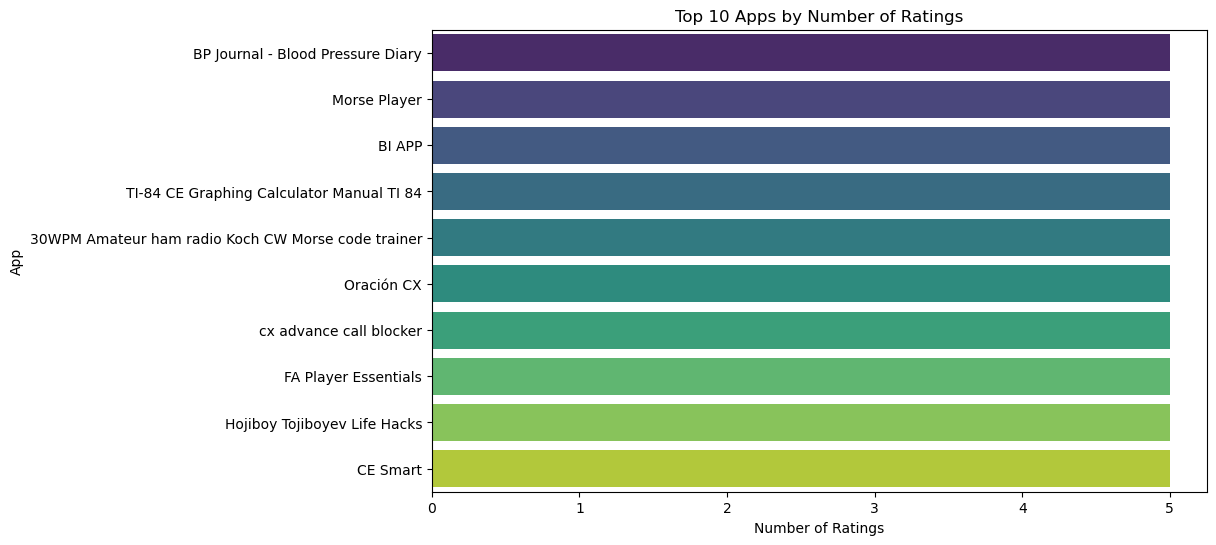

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_apps_rating , x='Rating' ,y='App',palette='viridis')
plt.title('Top 10 Apps by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('App')
plt.show()

In [64]:
# first - sort values
top_10_apps_reviews = df.sort_values(by='Reviews',ascending=False)

In [65]:
# Drop duplicates from App column
top_10_apps_reviews = top_10_apps_reviews.drop_duplicates(subset='App')

In [66]:
# select top 10 using head(10)
top_10_apps_reviews = top_10_apps_reviews.head(10)

In [70]:
print(top_10_apps_reviews['App'].to_string(index=False))

                                          Facebook
                                WhatsApp Messenger
                                         Instagram
          Messenger – Text and Video Chat for Free
                                    Clash of Clans
           Clean Master- Space Cleaner & Antivirus
                                    Subway Surfers
                                           YouTube
Security Master - Antivirus, VPN, AppLock, Booster
                                      Clash Royale


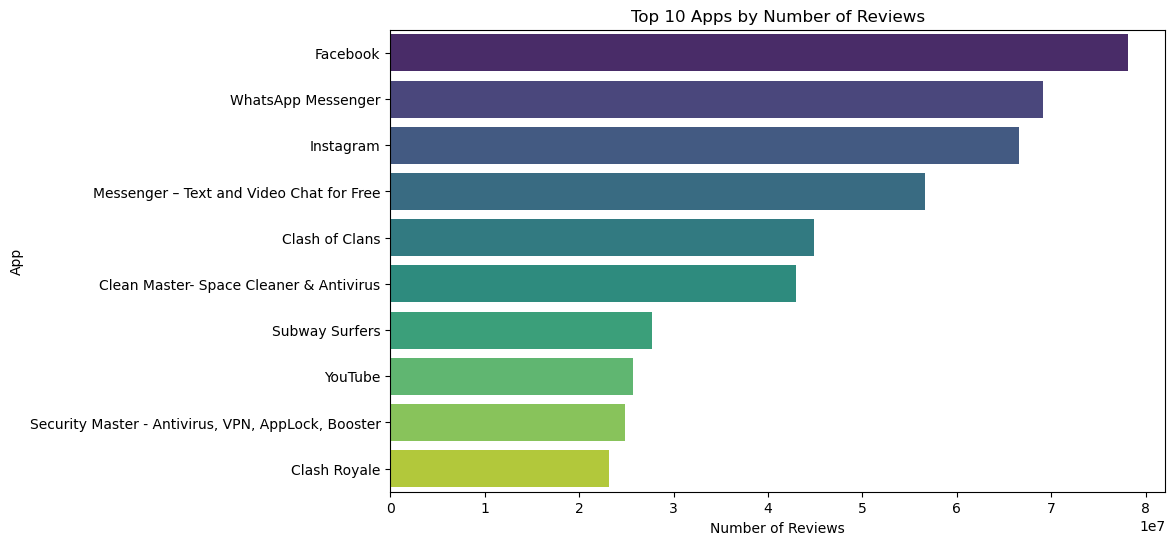

In [71]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_apps_reviews , x='Reviews' ,y='App',palette='viridis')
plt.title('Top 10 Apps by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('App')
plt.show()

In [72]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [73]:
# count the occurence
most_category = df['Category'].value_counts()

In [74]:
most_5_category = most_category.head(5)
most_5_category

Category
FAMILY      1968
GAME        1144
TOOLS        841
MEDICAL      463
BUSINESS     460
Name: count, dtype: int64

In [75]:
# no of occurence
most_5_category.values

array([1968, 1144,  841,  463,  460], dtype=int64)

In [76]:
most_5_category.index

Index(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS'], dtype='object', name='Category')

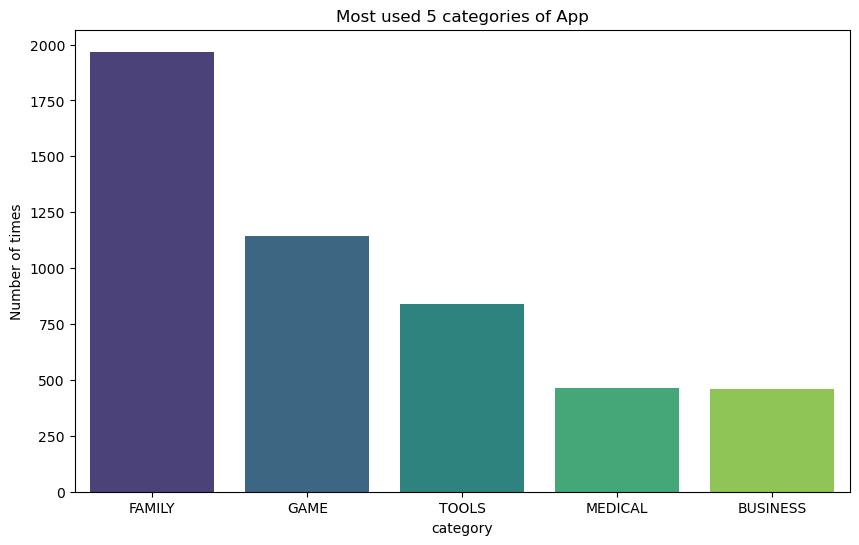

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(x=most_5_category.index ,y=most_5_category.values ,palette='viridis')
plt.title('Most used 5 categories of App')
plt.ylabel('Number of times')
plt.xlabel('category')
plt.show()

In [78]:
most_genres = df['Genres'].value_counts()
most_5_genres = most_genres.head(5)
most_5_genres

Genres
Tools            840
Entertainment    622
Education        548
Medical          463
Business         460
Name: count, dtype: int64

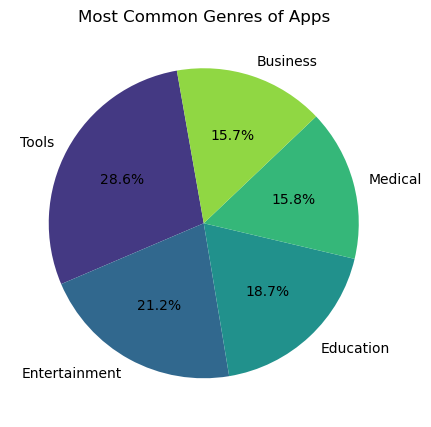

In [80]:
# Plotting the pie chart
plt.figure(figsize=(5, 6))
most_5_genres.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis',5),startangle=100)
plt.title('Most Common Genres of Apps')
plt.ylabel('')
plt.show()

In [81]:
df['Type'].value_counts()

Type
Free    10032
Paid      797
Name: count, dtype: int64

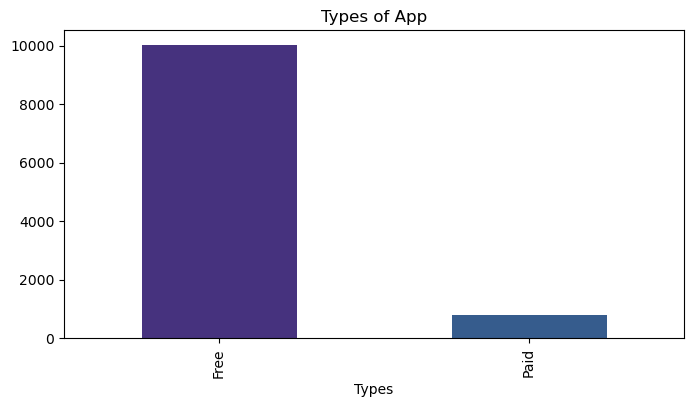

In [82]:
most_type = df['Type'].value_counts()

plt.figure(figsize=(8,4))
most_type.plot(kind='bar',color=sns.color_palette('viridis'))
plt.title('Types of App')
plt.ylabel('')
plt.xlabel('Types')
plt.show()

In [83]:
no_age_groups = df['Content Rating'].value_counts()
no_age_groups

Content Rating
Everyone           8704
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

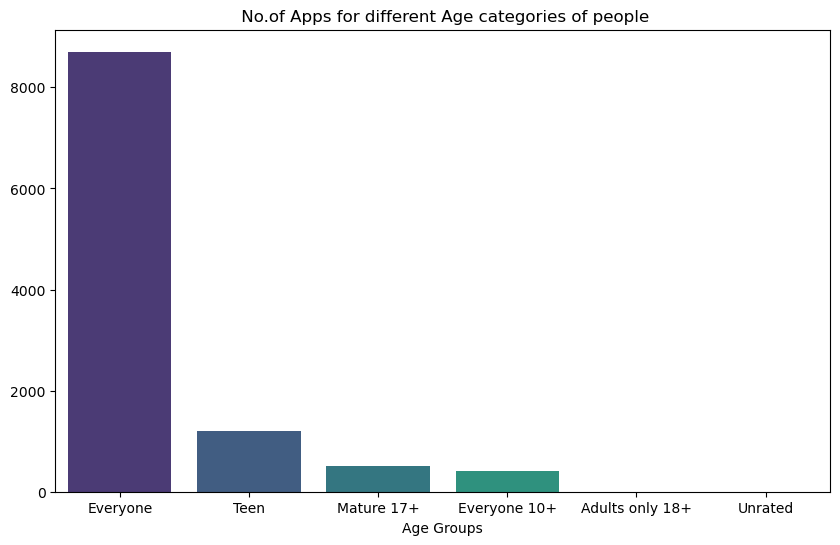

In [84]:
plt.figure(figsize=(10,6))
sns.barplot(x=no_age_groups.index ,y=no_age_groups.values ,palette='viridis')
plt.title(' No.of Apps for different Age categories of people')
plt.ylabel('')
plt.xlabel('Age Groups')
plt.show()